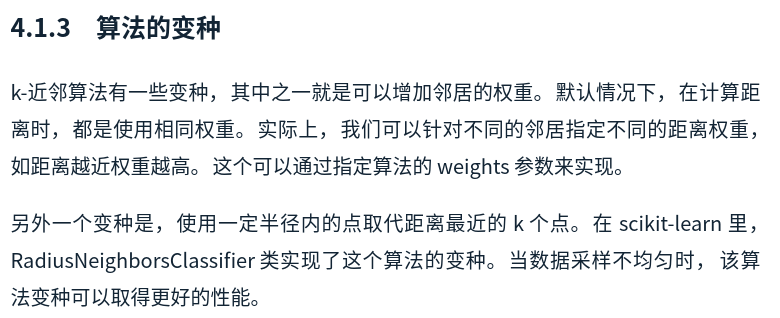

In [1]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
#生成数据
centers = [[-2,2],[2,2],[0,4]]
X,y = make_blobs(n_samples=60,centers=centers,
                random_state=0,cluster_std=0.60)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

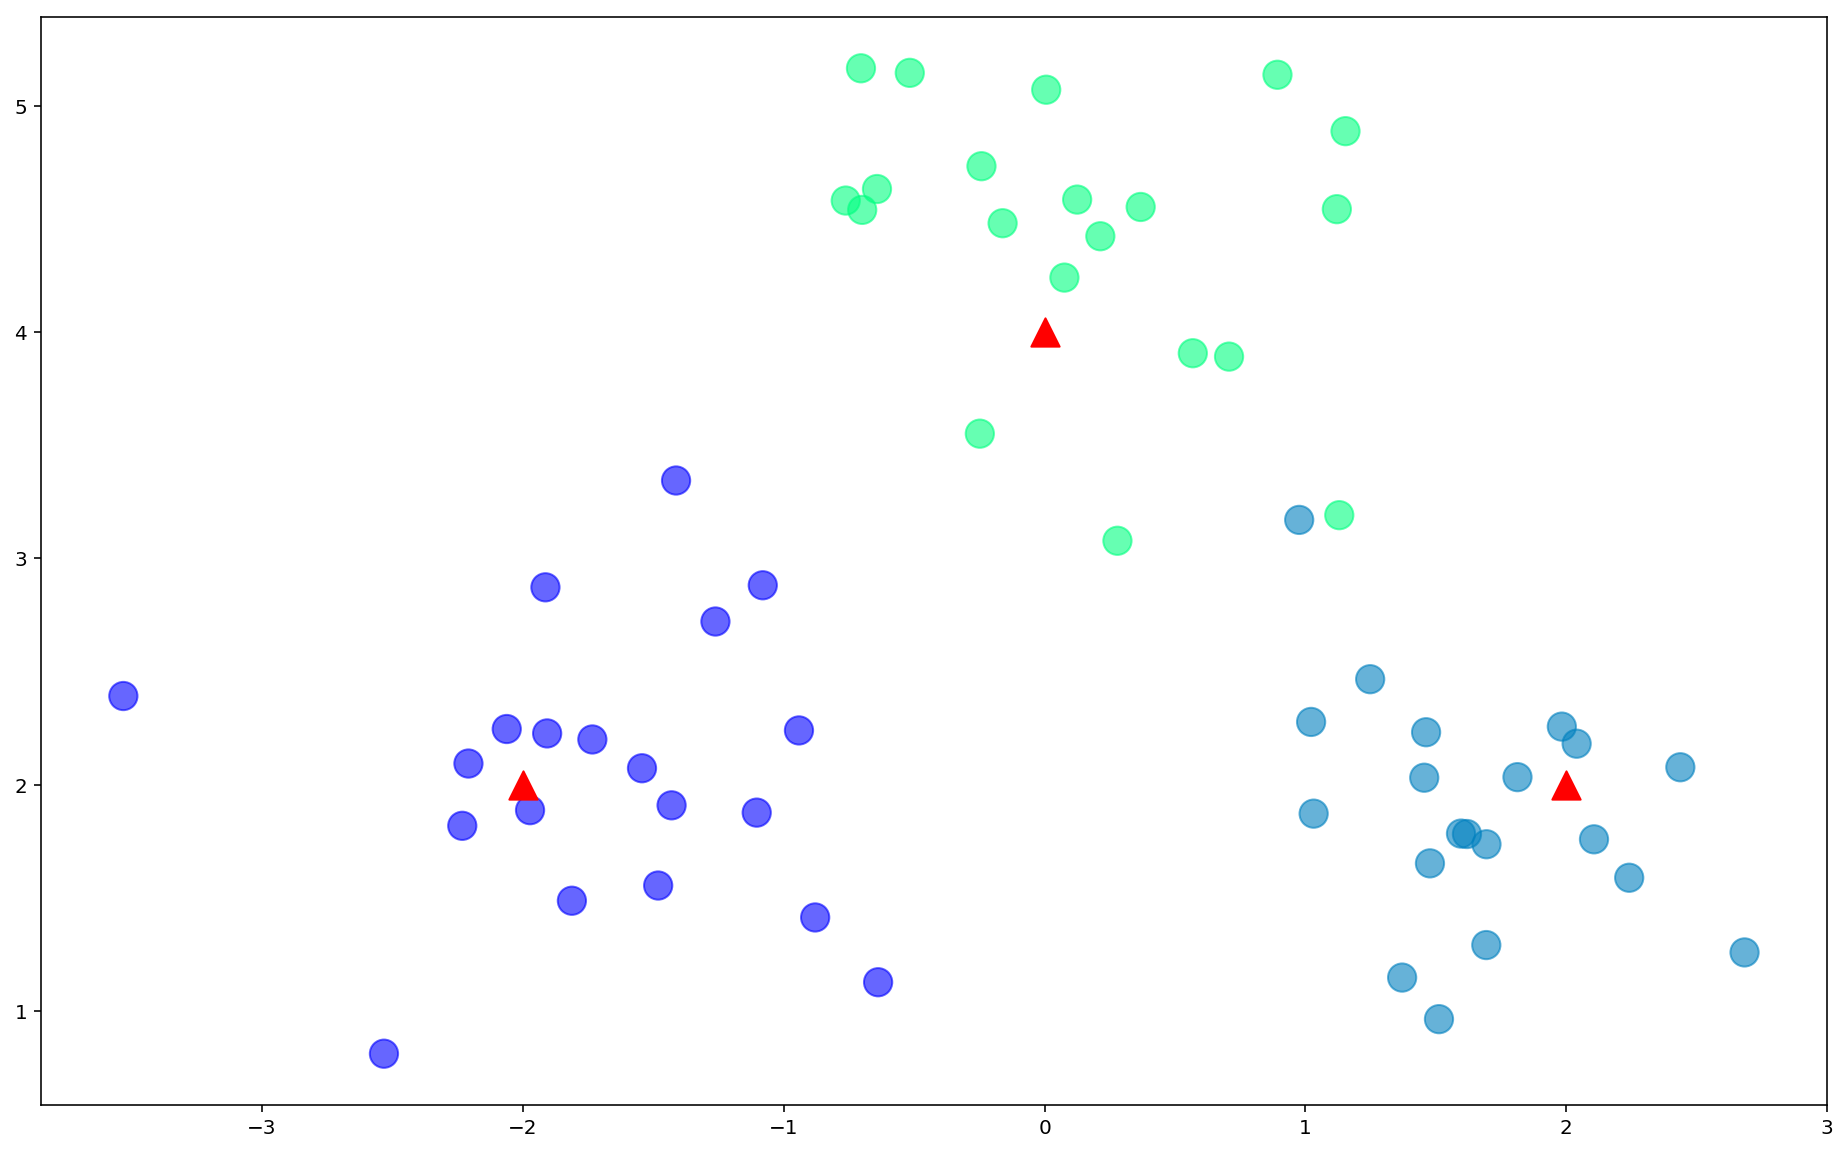

In [36]:
plt.figure(figsize=(16,10),dpi=144)
c = np.array(centers)
plt.scatter(X[:,0],X[:,1],c=y,s=200,cmap='winter',alpha=.6)
plt.scatter(c[:,0],c[:,1],s=200,marker='^',c='r')

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [97]:
#进行预测
X_sample=np.array([[0,2]])
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample,return_distance=False)

In [98]:
neighbors

array([[16, 20, 48,  6, 23]])

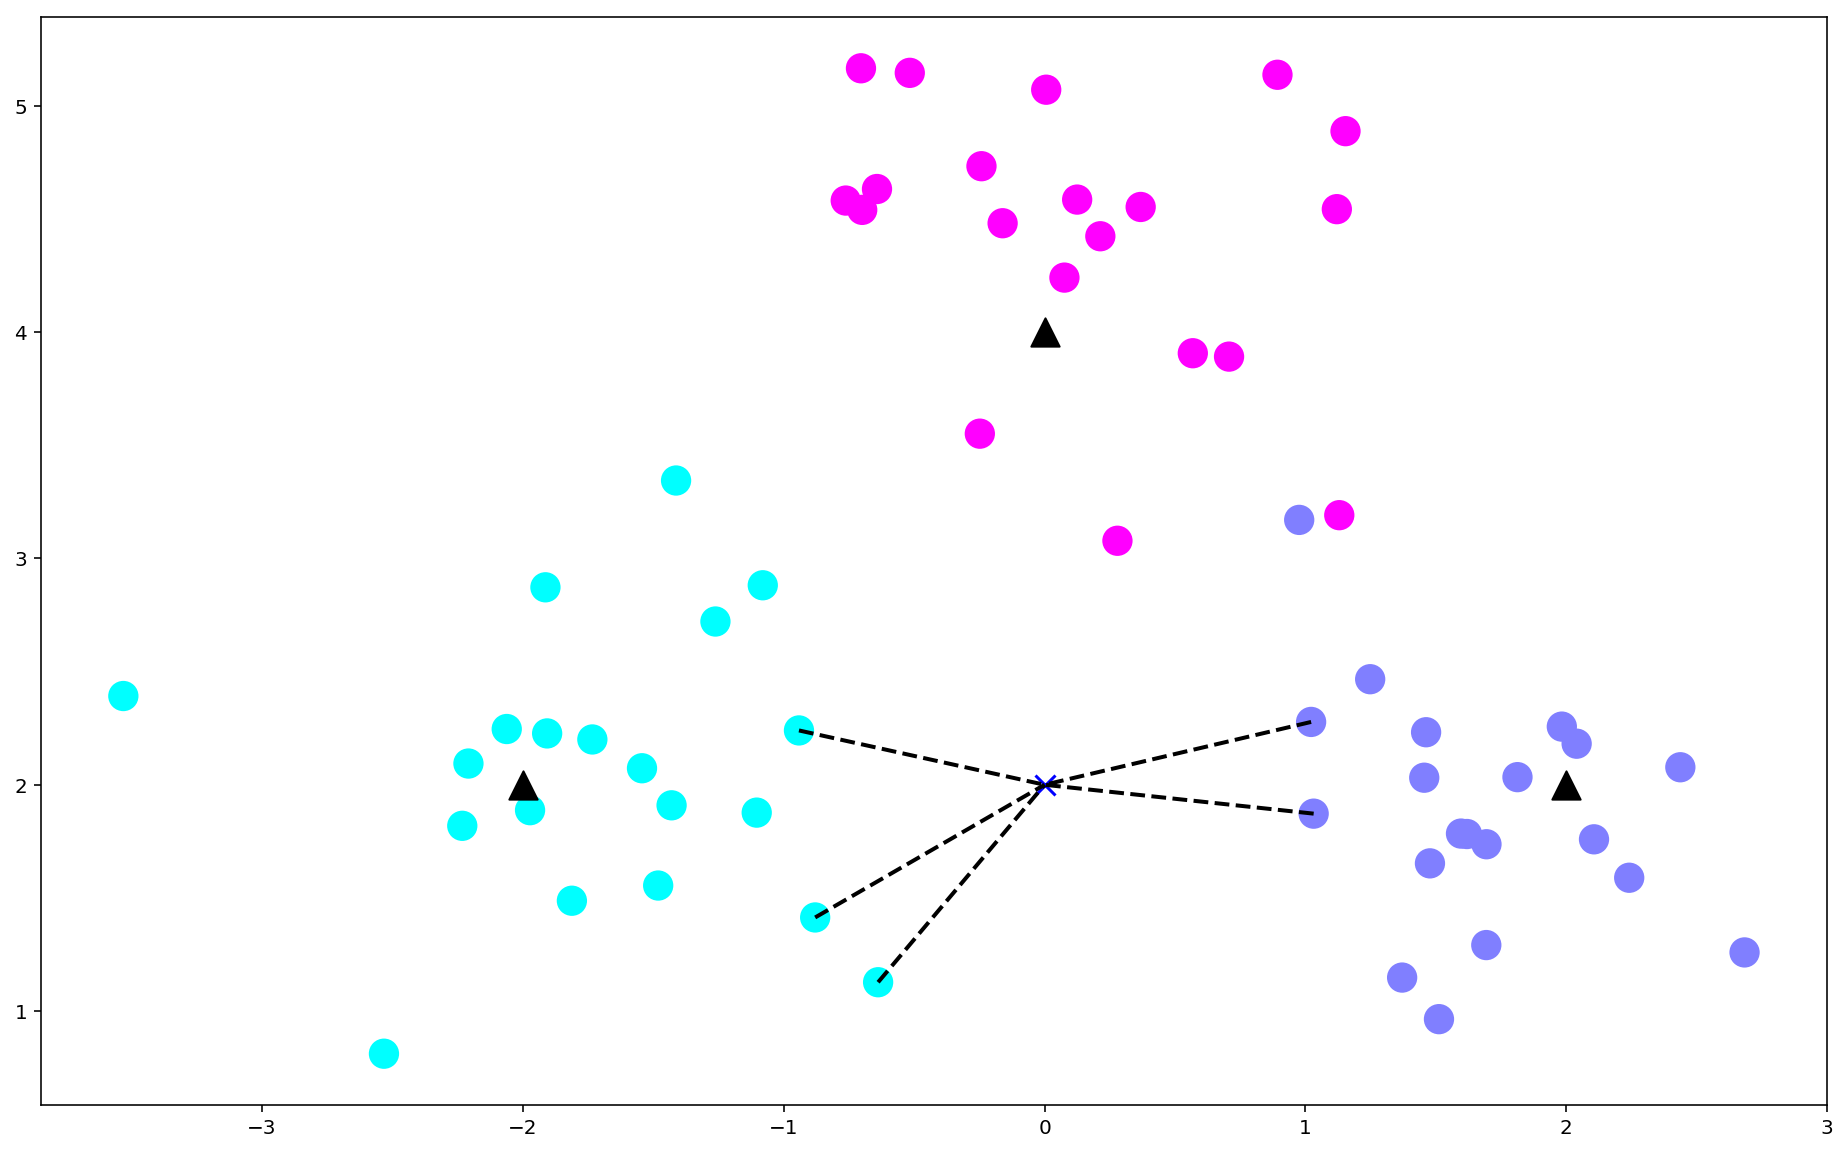

In [99]:
#画出示意图
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(X[:,0],X[:,1],c=y,s=200,cmap='cool')
plt.scatter(c[:,0],c[:,1],c='k',s=200,marker='^')
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=100,cmap='winter')

for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[:,0]],[X[i][1],X_sample[:,1]],'k--',linewidth=2)

## 使用K-近邻算法进行回归拟合  
>sklearn.neighors.KNeighborsRegressor

In [110]:
n_dots = 40
X = 5*np.random.rand(n_dots,1)
y = np.cos(X).ravel()
#加入噪声
y += 0.2 * np.random.rand(n_dots) - 0.1

In [111]:
#训练模型
from sklearn.neighbors import KNeighborsRegressor

In [132]:
k = 3
knn = KNeighborsRegressor(k)
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [133]:
#生成足够密集的点并进行预测
T = np.linspace(0,5,500)[:,np.newaxis]
y_pred = knn.predict(T)
knn.score(X,y)

0.9938639540502694

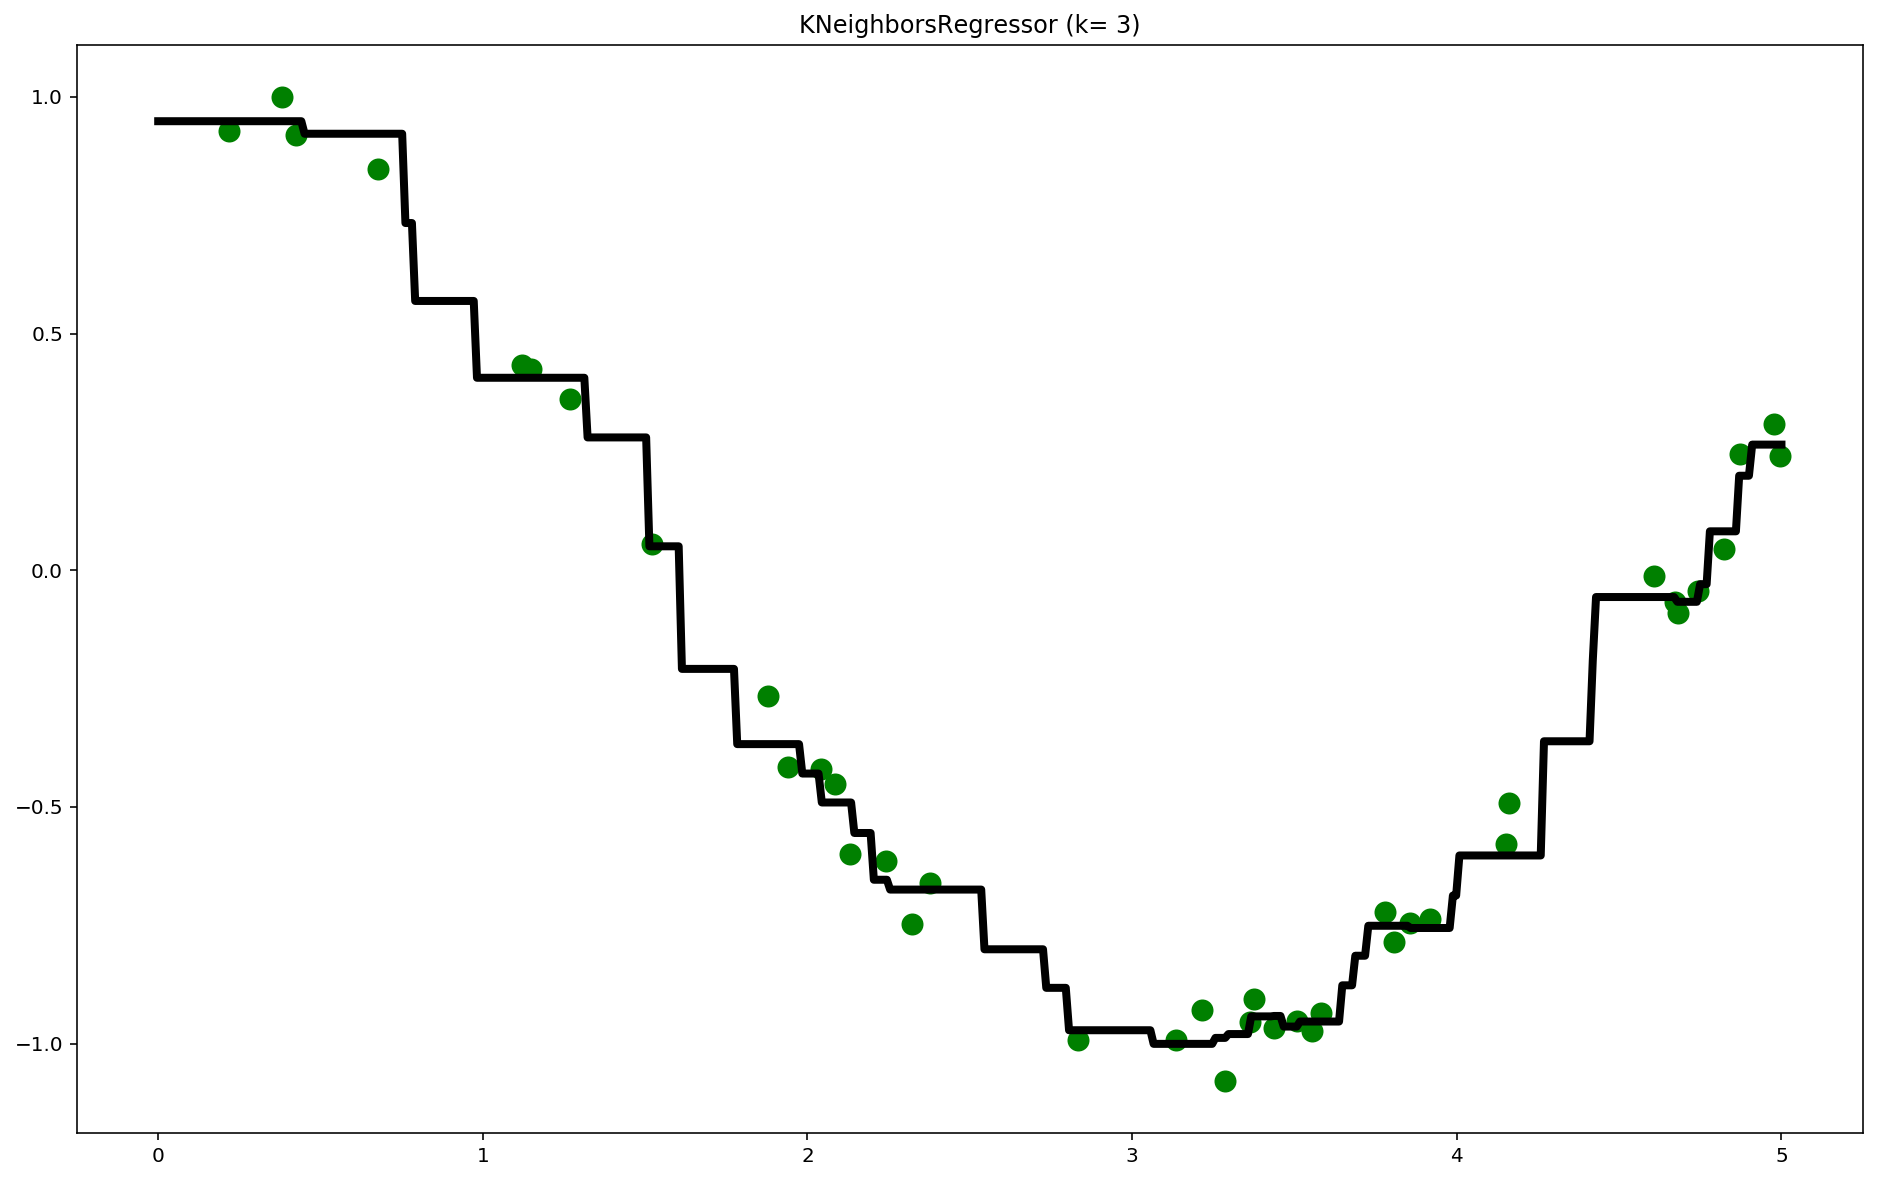

In [134]:
#画出拟合曲线
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(X,y,c='g',label='data',s=100)
plt.plot(T,y_pred,c='k',label='prediction',lw=4)
plt.axis('tight')
plt.title('KNeighborsRegressor (k= %i)' %k)
plt.show()

## 糖尿病预测

In [137]:
import pandas as pd

In [142]:
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [144]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [145]:
X = data.iloc[:,:8]
Y = data.iloc[:,8]

In [148]:
from sklearn.model_selection import train_test_split

In [150]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [158]:
#模型比较
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [182]:
#构造3个模型
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN with weights',KNeighborsClassifier(n_neighbors=2,
                                                       weights='distance')))
models.append(('Radius Neighbors',RadiusNeighborsClassifier(n_neighbors=2,radius=200.0)))

#分别训练3个模型，并计算评分
results = []
for name,model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
    print('name:{}; score:{}'.format(results[i][0],results[i][1]))
    

name:KNN; score:0.7597402597402597
name:KNN with weights; score:0.6948051948051948
name:Radius Neighbors; score:0.7207792207792207


### 交叉验证：KFold 和cross_val_score()

In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [188]:
results=[]
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X,Y,cv=kfold)
    results.append((name,cv_result))
    
for i in range(len(results)):
    print('name: {}; cross val score:{}'.format(results[i][0],results[i][1].mean()))

name: KNN; cross val score:0.7147641831852358
name: KNN with weights; cross val score:0.6770505809979495
name: Radius Neighbors; cross val score:0.6549384825700615


## 训练

In [190]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
train_score=knn.score(X_train,Y_train)
test_score = knn.score(X_test,Y_test)
print('train score: {}; tests core:{}'.format(train_score,test_score))

train score: 0.8338762214983714; tests core:0.7597402597402597


### 学习曲线

In [191]:
from sklearn.model_selection import ShuffleSplit

In [211]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/zyc/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

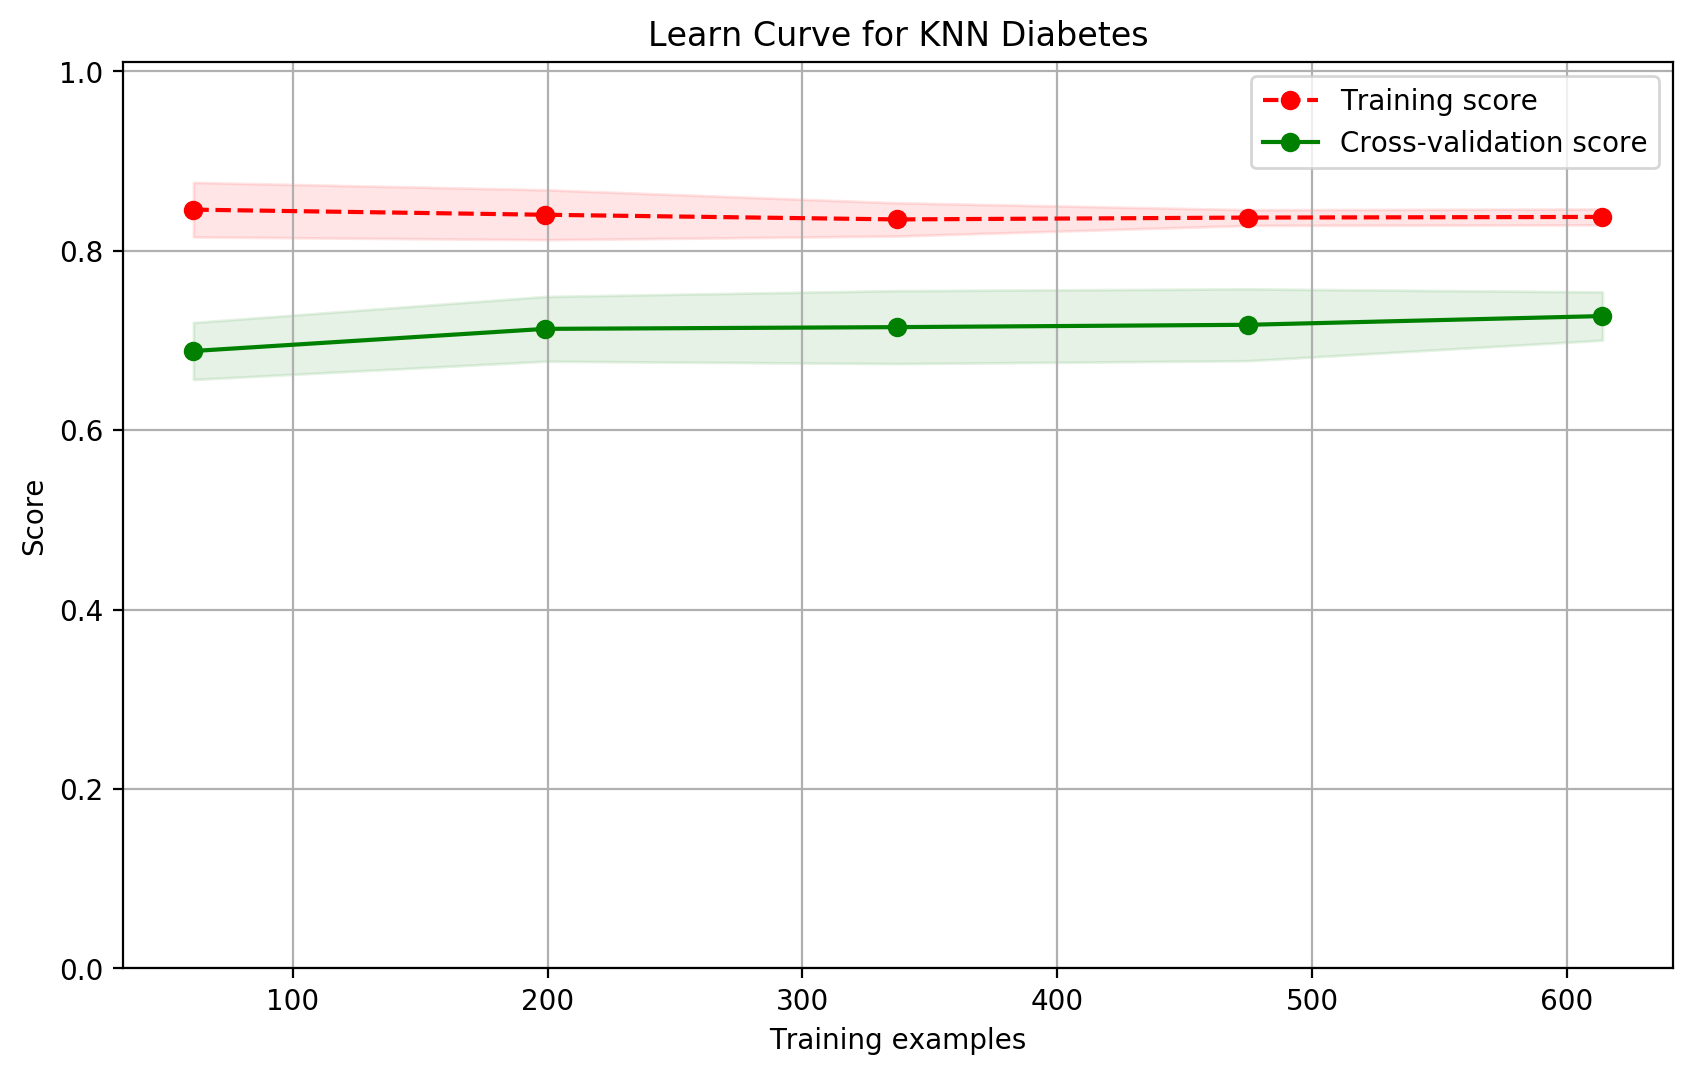

In [212]:
knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(10,6),dpi=200)
plot_learning_curve(plt,knn,'Learn Curve for KNN Diabetes',X,Y,ylim=(0.0,1.01),cv=cv)

## 特征选择可数据可视化

#### scilit-learn 在 sklearn.feature_secection 提供了丰富的特征选择方法

In [213]:
from sklearn.feature_selection import SelectKBest

In [215]:
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X,Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

In [219]:
results=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result = cross_val_score(model,X_new,Y,cv=kfold)
    results.append((name,cv_result))
    
      
for i in range(len(results)):
    print('name: {}; cross val score:{}'.format(results[i][0],
        results[i][1].mean()))

name: KNN; cross val score:0.725205058099795
name: KNN with weights; cross val score:0.6900375939849623
name: Radius Neighbors; cross val score:0.6510252904989747


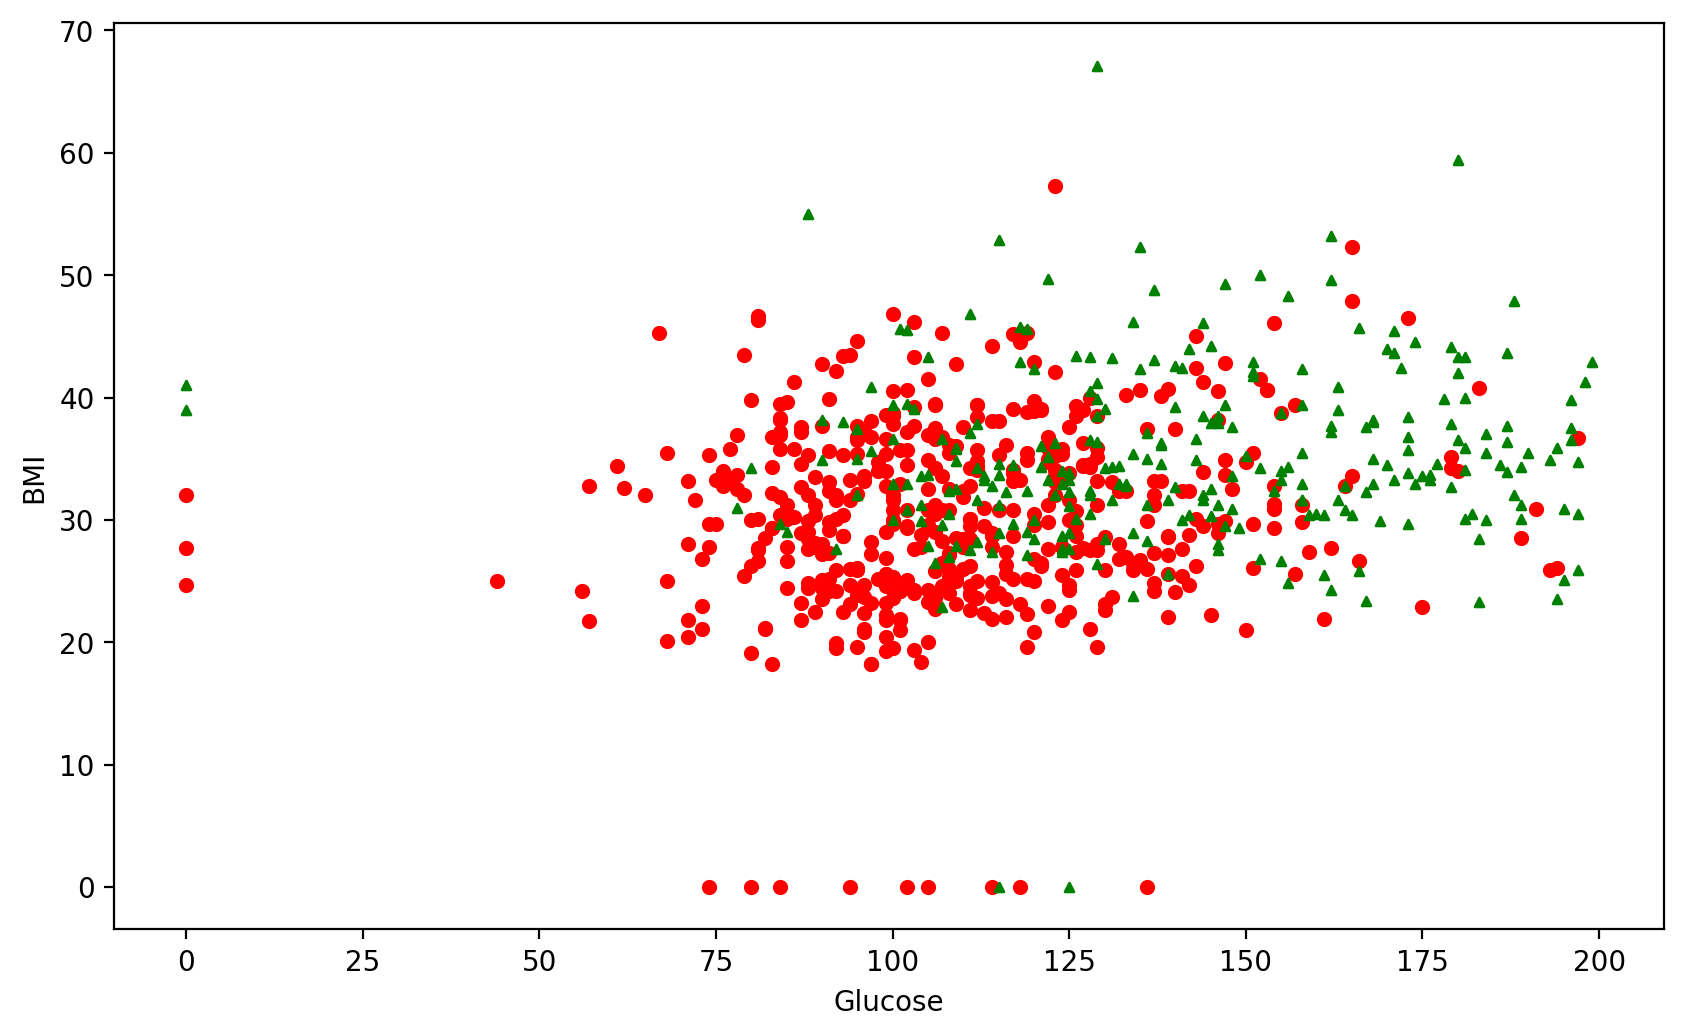

In [221]:
#画出数据，看下为什么无法很好的拟合
plt.figure(figsize=(10,6),dpi=200)
plt.ylabel("BMI")
plt.xlabel("Glucose")

#画出Y==0的阴性样本，用圆圈表示
plt.scatter(X_new[Y==0][:,0],X_new[Y==0][:,1],c='r',s=20,marker='o')

#画出Y==1的阳性样本，用三角表示
plt.scatter(X_new[Y==1][:,0],X_new[Y==1][:,1],c='g',s=10,marker='^')

scikit-learn中，计算卡方检验的函数是  
**sklearn.feature_selection.chi2()**     
**sklrarn.feature_selection.f_classif()**